# **<center> Human Activity Recognition</center>**




---




---



**Here are the steps we will perform:**

- **Step 1: Download and Extract the Dataset**
- **Step 2: Visualize the Data with its Labels**
- **Step 3: Read and Preprocess the Dataset**
- **Step 4: Split the Data into Train and Test Set**
- **Step 5: Construct the Model**
- **Step 6: Compile & Train the Model**
- **Step 7: Plot Model’s Loss & Accuracy Curves**
- **Step 8: Make Predictions with the Model**

Make sure you have pafy, youtube-dl and moviepy packages installed.

In [ ]:
!pip install pafy youtube-dl moviepy

     |████████████████████████████████| 1.9MB 16.5MB/s 


In [ ]:
#! pip install py7zr
!pip install gdown

#### **Import Required Libraries:**
Start by importing all required libraries.

In [ ]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential ,model_from_json
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

**Set Numpy, Python & Tensorflow seeds to get consistent results.**

In [ ]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

## **Step 1: Download and Extract the Dataset**

Let’s start by downloading the dataset. 

The Dataset we are using from dirve

**training data ** is an action recognition dataset which contains:

*   **10** Action Categories consisting of realistic YouTube videos


After downloading the data, you will need to extract it.


In [ ]:
os.getcwd()

'/content'

In [ ]:
import gdown

url = 'https://drive.google.com/u/0/uc?export=download&confirm=-fln&id=1TPHNa6iwwJr0i9JmzN-c3YAf_tn7cwKz'
output = 'train_images.7z'
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=-fln&id=1TPHNa6iwwJr0i9JmzN-c3YAf_tn7cwKz
To: /content/train_images.7z
3.28GB [00:50, 64.6MB/s]


'train_images.7z'

In [ ]:
!7z e train_images.7z -odataset


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 3275965290 bytes (3125 MiB)

Extracting archive: train_images.7z
--
Path = train_images.7z
Type = 7z
Physical Size = 3275965290
Headers Size = 290308
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      0% 71 - train_images/breakdancing/breakdancing1050.jpg                                                          0% 128 - train_images/breakdancing/breakdancing1101.jpg                                                           0% 244 - train_images/breakdancing/breakdancing1206.jpg

## **Step 2: Visualize the Data with its Labels**
Let's pick some random videos from each class of the dataset and display it, this will give us a good overview of how the dataset look like.

In [ ]:
os.getcwd()

'/content'

In [ ]:
import os

directory_list = list()
cat_names=[]
for root, dirs, files in os.walk("dataset", topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))
        cat_names.append(os.path.join(name))

print(directory_list)
print(cat_names)
print(len(cat_names))

['dataset/pushup', 'dataset/raisingeyebrows', 'dataset/celebrating', 'dataset/breakdancing', 'dataset/climbingarope', 'dataset/ridingscooter', 'dataset/calligraphy', 'dataset/claypotterymaking', 'dataset/golfdriving', 'dataset/eatingicecream', 'dataset/.ipynb_checkpoints', 'dataset/cookingoncampfire']
['pushup', 'raisingeyebrows', 'celebrating', 'breakdancing', 'climbingarope', 'ridingscooter', 'calligraphy', 'claypotterymaking', 'golfdriving', 'eatingicecream', '.ipynb_checkpoints', 'cookingoncampfire']
12


In [ ]:
all_classes_names = os.listdir('dataset')
print(len(all_classes_names))
print(all_classes_names)


29612
['pushup2138.jpg', 'ridingscooter2639.jpg', 'golfdriving1138.jpg', 'climbingarope1777.jpg', 'climbingarope46.jpg', 'pushup92.jpg', 'breakdancing2309.jpg', 'raisingeyebrows918.jpg', 'raisingeyebrows342.jpg', 'pushup1740.jpg', 'calligraphy123.jpg', 'breakdancing1164.jpg', 'raisingeyebrows1087.jpg', 'celebrating1189.jpg', 'climbingarope2155.jpg', 'eatingicecream2288.jpg', 'raisingeyebrows441.jpg', 'raisingeyebrows1828.jpg', 'eatingicecream667.jpg', 'eatingicecream1328.jpg', 'claypotterymaking1174.jpg', 'ridingscooter197.jpg', 'celebrating623.jpg', 'climbingarope808.jpg', 'breakdancing1491.jpg', 'claypotterymaking2724.jpg', 'ridingscooter2383.jpg', 'calligraphy2519.jpg', 'cookingoncampfire1628.jpg', 'cookingoncampfire535.jpg', 'cookingoncampfire2594.jpg', 'breakdancing706.jpg', 'breakdancing703.jpg', 'ridingscooter373.jpg', 'ridingscooter2458.jpg', 'golfdriving507.jpg', 'golfdriving67.jpg', 'pushup702.jpg', 'pushup1557.jpg', 'climbingarope840.jpg', 'claypotterymaking1252.jpg', 'ridin

In [ ]:
import shutil, os
for categry_name in cat_names:

    for image_name in all_classes_names:

          if categry_name in image_name:
               shutil.move(f'dataset/{image_name}', f'dataset/{categry_name}')



In [ ]:
cat_names.remove(".ipynb_checkpoints")
for filename in cat_names:
      class1_all_images = os.listdir(f'dataset/{filename}')
      print(f"{filename} contains :  ",len(class1_all_images) , "images")
      print(class1_all_images)

pushup contains :   2257 images
['pushup2138.jpg', 'pushup92.jpg', 'pushup1740.jpg', 'pushup702.jpg', 'pushup1557.jpg', 'pushup1776.jpg', 'pushup2147.jpg', 'pushup382.jpg', 'pushup2186.jpg', 'pushup1426.jpg', 'pushup293.jpg', 'pushup2119.jpg', 'pushup1197.jpg', 'pushup685.jpg', 'pushup330.jpg', 'pushup2067.jpg', 'pushup1731.jpg', 'pushup1030.jpg', 'pushup802.jpg', 'pushup554.jpg', 'pushup1877.jpg', 'pushup1681.jpg', 'pushup604.jpg', 'pushup1216.jpg', 'pushup1140.jpg', 'pushup491.jpg', 'pushup941.jpg', 'pushup721.jpg', 'pushup1646.jpg', 'pushup3.jpg', 'pushup1418.jpg', 'pushup230.jpg', 'pushup1978.jpg', 'pushup1845.jpg', 'pushup736.jpg', 'pushup1291.jpg', 'pushup2008.jpg', 'pushup648.jpg', 'pushup1232.jpg', 'pushup767.jpg', 'pushup871.jpg', 'pushup1591.jpg', 'pushup1638.jpg', 'pushup59.jpg', 'pushup1953.jpg', 'pushup716.jpg', 'pushup299.jpg', 'pushup91.jpg', 'pushup1820.jpg', 'pushup1031.jpg', 'pushup616.jpg', 'pushup1510.jpg', 'pushup289.jpg', 'pushup935.jpg', 'pushup1173.jpg', 'pushup

## **Step 3: Read & Preprocess the Dataset**

Since we're going to use a classification architecture to train on a video classification dataset, we're goiing to need to preprocess the dataset first.

Now w constants, 
- **`image_height`** and **`image_weight`**: This is the size we will resize all frames of the video to, we're doing this to avoid unneccsary computation.

- **`max_images_per_class`**: Maximum number of training images allowed for each class.

- **`dataset_directory`**: The path of the directory containing the extracted dataset. 

- **`classes_list`**: These are the list of classes we're going to be training on, we're traninng on following 4 classes, you can feel free to change it. 
  - *tai chi*
  - *Swinging*
  - *Horse Racing*
  - *Walking with a Dog*

**Note:** The `image_height`, `image_weight` and `max_images_per_class` constants may be increased for better results, but be warned this will become computationally expensive.

In [ ]:
image_height, image_width = 64, 64
max_images_per_class = 2000

dataset_directory = "train_images"
classes_list = cat_names
print(classes_list)
model_output_size = len(classes_list)
print(model_output_size)

['pushup', 'raisingeyebrows', 'celebrating', 'breakdancing', 'climbingarope', 'ridingscooter', 'calligraphy', 'claypotterymaking', 'golfdriving', 'eatingicecream', 'cookingoncampfire']
11


### **Extract, Resize & Normalize Frames**


Now we'll create a function that will extract frames from each video while performing other preprocessing operation like resizing and normalizing images. 

This method takes a video file path as input. It then reads the video file frame by frame, resizes each frame, normalizes the resized frame, appends the normalized frame into a list and then finally returns that list.

In [ ]:
def frames_extraction(class__name):
    # Empty List declared to store each class frames
    frames_list = []
    images_per_class = os.listdir(f'dataset/{class__name}')
    for ind in images_per_class:
            
    
            image_reader = cv2.imread(f'dataset/{class__name}/{ind}')
            #height, width, channels = image_reader.shape
            #print(height, width, channels)
            # Resize the Frame to fixed Dimensions
            resized_frame = cv2.resize(image_reader, (image_height, image_width), interpolation=cv2.INTER_AREA)
            
            # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
            normalized_frame = resized_frame / 255
            
            # Appending the normalized frame into the frames list
            frames_list.append(normalized_frame)
            
    # returning the frames list 
    return frames_list

### **Dataset Creation**
Now we'll create another function called  **`create_dataset()`**,  this function uses the **`frame_extraction()`** funciton above and creates our final preprocessed dataset. 

**Here's how this function works:**

1.   Iterate through all the classes mentioned in the `classes_list`
2.   Now for each class iterate through all the video files present in it. 
3.   Call the **frame_extraction** method on each video file.
4.   Add the returned frames to a list called `temp_features`
5.   After all videos of a class are processed, randomly select video frames (equal to **max_images_per_class**) and add them to the list called `features`.
6.   Add labels of the selected videos to the labels list.
7.   After all videos of all classes are processed then return the features and labels as numpy arrays.


So when you call this function, it returns **2** lists:
- a list of feature vectors 
- a list of it's associated labels.


In [ ]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Iterating through all the files present in the files list

        # Calling the frame_extraction method for every video file path
        frames = frames_extraction(class_name)
        # Appending the frames to a temporary list.
        temp_features.extend(frames)
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

Calling the **create_dataset** method which returns features and labels.

In [ ]:
features, labels = create_dataset()

Extracting Data of Class: pushup
Extracting Data of Class: raisingeyebrows
Extracting Data of Class: celebrating
Extracting Data of Class: breakdancing
Extracting Data of Class: climbingarope
Extracting Data of Class: ridingscooter
Extracting Data of Class: calligraphy
Extracting Data of Class: claypotterymaking
Extracting Data of Class: golfdriving
Extracting Data of Class: eatingicecream
Extracting Data of Class: cookingoncampfire


In [ ]:
###features

Now we will convert class labels to one hot encoded vectors.

In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
len(one_hot_encoded_labels)

22000

## **Step 4: Split the Data into Train and Test Set**
Now we have 2 numpy arrays, one containing all images, the second one contains all class labels in one hot encoded format. Let’s split our data to create a training and a testing set. It’s important that you shuffle your data before the split which we have already done.


In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [ ]:
import numpy as np

print("data type is ",type(features_test))
print("testing data is  " , labels_test.shape)
print("testing data is  " , features_test[0])




"""dim2d_array=features_test.reshape(features_test.shape[0], -1)
##print("2d array dim ", dim2d_array)


a_file = open("test.txt", "w")
np.savetxt(a_file, dim2d_array)

a_file.close()"""

data type is  <class 'numpy.ndarray'>
testing data is   (4400, 11)
testing data is   [[[0.83921569 0.94901961 0.95294118]
  [0.81568627 0.93333333 0.93333333]
  [0.45490196 0.50980392 0.50196078]
  ...
  [0.21176471 0.23921569 0.22745098]
  [0.14509804 0.18431373 0.16078431]
  [0.12156863 0.14509804 0.13333333]]

 [[0.86666667 0.95294118 0.96862745]
  [0.82745098 0.94117647 0.94117647]
  [0.4745098  0.52941176 0.52156863]
  ...
  [0.20784314 0.23137255 0.22352941]
  [0.14901961 0.18431373 0.16470588]
  [0.12156863 0.14509804 0.13333333]]

 [[0.8745098  0.96470588 0.97647059]
  [0.84313725 0.94901961 0.96078431]
  [0.49019608 0.54509804 0.54509804]
  ...
  [0.20784314 0.23137255 0.21960784]
  [0.15294118 0.18823529 0.17254902]
  [0.12156863 0.14901961 0.12941176]]

 ...

 [[0.19607843 0.2627451  0.24705882]
  [0.21568627 0.27058824 0.2627451 ]
  [0.21568627 0.2745098  0.26666667]
  ...
  [0.1254902  0.17254902 0.16078431]
  [0.10980392 0.15686275 0.1372549 ]
  [0.08627451 0.14509804 0.1

'dim2d_array=features_test.reshape(features_test.shape[0], -1)\n##print("2d array dim ", dim2d_array)\n\n\na_file = open("test.txt", "w")\nnp.savetxt(a_file, dim2d_array)\n\na_file.close()'

In [ ]:
##original_array = np.loadtxt("test.txt").reshape(4400,64, 64, 3)
### 4400, 11
print(original_array.shape)


(4400, 64, 64, 3)


## **Step 5: Construct the Model**
Now it’s time to create our CNN model, for this post, we're c reating a simple CNN Classification model with two CNN layers.

In [ ]:
# Let's create a function that will construct our model
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
   
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

### **Check Model’s Structure:**
Using the **plot_model** function you can check the structure of the final model, this is really helpful when you’re creating a complex network and you want to make sure you have constructed the network correctly.

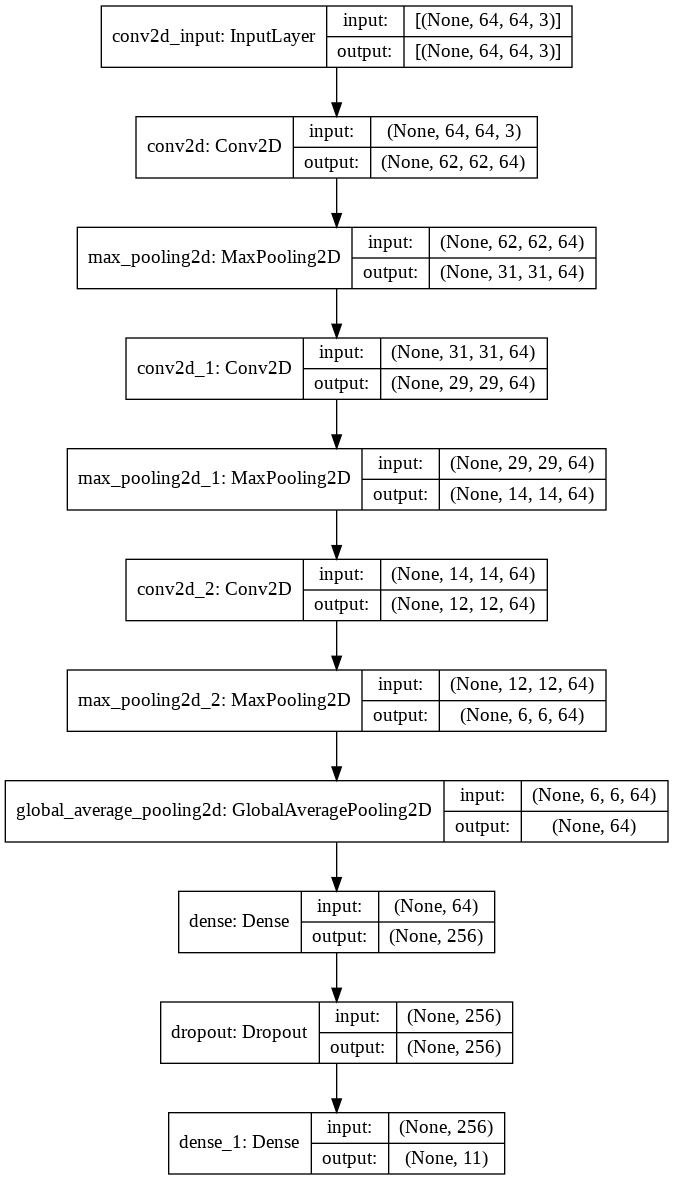

In [ ]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

## **Step 6: Compile & Train the Model**


Now let's start the training. Before we do that, we also need to complile the model.


In [ ]:
# Adding the Early Stopping Callback to the model which will continuously monitor the validation loss metric for every epoch.
# If the models validation loss does not decrease after 15 consecutive epochs, the training will be stopped and the weight which reported the lowest validation loss will be retored in the model.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 8, mode = 'min', restore_best_weights = True)
# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/50
3520/3520 [==============================] - 26s 7ms/step - loss: 2.0236 - accuracy: 0.2692 - val_loss: 0.5928 - val_accuracy: 0.8142
Epoch 2/50
3520/3520 [==============================] - 25s 7ms/step - loss: 0.5172 - accuracy: 0.8346 - val_loss: 0.1380 - val_accuracy: 0.9636
Epoch 3/50
3520/3520 [==============================] - 24s 7ms/step - loss: 0.2139 - accuracy: 0.9342 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 4/50
3520/3520 [==============================] - 25s 7ms/step - loss: 0.1365 - accuracy: 0.9560 - val_loss: 0.0504 - val_accuracy: 0.9801
Epoch 5/50
3520/3520 [==============================] - 25s 7ms/step - loss: 0.1140 - accuracy: 0.9648 - val_loss: 0.0400 - val_accuracy: 0.9830
Epoch 6/50
3520/3520 [==============================] - 24s 7ms/step - loss: 0.0905 - accuracy: 0.9696 - val_loss: 0.0404 - val_accuracy: 0.9835
Epoch 7/50
3520/3520 [==============================] - 24s 7ms/step - loss: 0.0760 - accuracy: 0.9732 - val_loss: 0.0320 - val_ac

### **Evaluating Your Trained Model**
Evaluate your trained model on the feature's and label's test sets.

In [ ]:
model_evaluation_history = model.evaluate(features_test, labels_test)

138/138 [==============================] - 1s 8ms/step - loss: 0.0232 - accuracy: 0.9857


### **Save the Model**
You should now save your model for future runs.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model552021.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model5.h5'

# Saving your Model
model.save_weights(model_name)

## Reload the model and his weight to reuse it

In [ ]:
# load json and create model
json_file = open('model552021.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Model5.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
score = loaded_model.evaluate(features_test, labels_test )
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
138/138 [==============================] - 1s 7ms/step - loss: 0.0220 - accuracy: 0.9839
accuracy: 98.57%


## **Step 7: Plot Model’s Loss & Accuracy Curves**
Let's plot our loss and accuracy curves.

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))
  ## saving the plot as an image
  plt.savefig(plot_name)
  # Adding legend to the plot
  plt.legend()

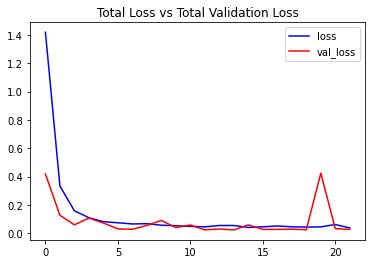

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

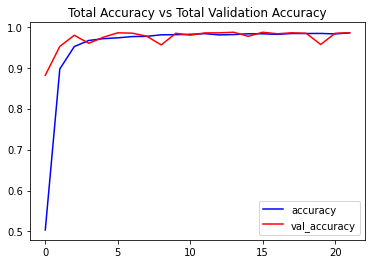

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

model prediction

In [ ]:
def download_youtube_videos(youtube_video_url, output_directory):
    # Creating a Video object which includes useful information regarding the youtube video.
    video = pafy.new(youtube_video_url)

    # Getting the best available quality object for the youtube video.
    video_best = video.getbest()

    # Constructing the Output File Path
    output_file_path = f'{output_directory}/{video.title}.mp4'

    # Downloading the youtube video at the best available quality.
    video_best.download(filepath = output_file_path, quiet = True)

    # Returning Video Title
    return video.title

In [ ]:
def predict_on_live_video(video_file_path, output_file_path, window_size):

    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))
    i=0
    while True: 

        # Reading The Frame
        status, frame = video_reader.read() 

        if not status:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
        print("p= ",predicted_labels_probabilities )
        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:

            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)

            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)

            # Accessing The Class Name using predicted label.
            predicted_class_name = classes_list[predicted_label]
          
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.imwrite(f"\\data\\output{i}.jpg",frame)
            i+=1

        # Writing The Frame
        

        video_writer.write(frame)


        # cv2.imshow('Predicted Frames', frame)

        # key_pressed = cv2.waitKey(10)

        # if key_pressed == ord('q'):
        #     break

    # cv2.destroyAllWindows()

    
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()

test the model

In [ ]:
# Creating The Output directories if it does not exist
output_directory = 'Youtube_Videos'
os.makedirs(output_directory, exist_ok = True)

# Downloading a YouTube VideoCdXyE
video_title = download_youtube_videos('https://www.youtube.com/watch?v=mYjRhMaxVEA', output_directory)

# Getting the YouTube Video's path you just downloaded
input_video_file_path = f'{output_directory}/{video_title}.mp4'

In [ ]:
# Setting sthe Widow Size which will be used by the Rolling Averge Proces
window_size = 25

# Construting The Output YouTube Video Path
output_video_file_path = f'{output_directory}/{video_title} -Output-WSize {window_size}.mp4'

# Calling the predict_on_live_video method to start the Prediction.
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)

# Play Video File in the Notebook
##VideoFileClip(output_video_file_path).ipython_display(width = 700)